Undefitting and overfitting are quite common in machine and deep learning trainings, due to inadequate and excessive training of the dataset respectively. In this notebook, we will continue to use the dataset from [IMBD Dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) as in text classification. And we will build and train different models to visualize underfitting and overfitting.

In [1]:
# Import needed libraries.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

For each data sequence, we apply multi-hot encoding to mark the appearance of each word in each data sequence. Note that the multi-hot encoding does NOT record number of appearance but just whether each word exists in each sequence. Since the dataset indices are ordered according to frequences of words in the entire dataset, the multi-hot encoding dataset should have more word existance near 0's.

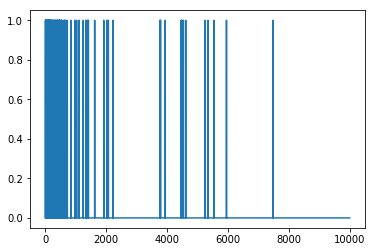

In [2]:
# Load and multi-hot encode the dataset
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot(data, dim):
    multi_hot_data = np.zeros((len(data), dim))
    for i, word_index in enumerate(data):
        multi_hot_data[i, word_index] = 1
    return multi_hot_data

train_data = multi_hot(train_data, NUM_WORDS)
test_data = multi_hot(test_data, NUM_WORDS)

plt.plot(train_data[0])
plt.show()

In [3]:
# Baseline model Construction.
base_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

base_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Train the baseline model.
base_hist = base_model.fit(train_data,
                           train_labels,
                           epochs=20,
                           batch_size=512,
                           validation_data=(test_data, test_labels),
                           verbose=2  # 0 if no output; 1 if progress bar; 2 if print progress each epoch
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4527 - acc: 0.8163 - binary_crossentropy: 0.4527 - val_loss: 0.3158 - val_acc: 0.8811 - val_binary_crossentropy: 0.3158
Epoch 2/20
 - 5s - loss: 0.2329 - acc: 0.9168 - binary_crossentropy: 0.2329 - val_loss: 0.2834 - val_acc: 0.8874 - val_binary_crossentropy: 0.2834
Epoch 3/20
 - 4s - loss: 0.1736 - acc: 0.9394 - binary_crossentropy: 0.1736 - val_loss: 0.2941 - val_acc: 0.8840 - val_binary_crossentropy: 0.2941
Epoch 4/20
 - 4s - loss: 0.1393 - acc: 0.9524 - binary_crossentropy: 0.1393 - val_loss: 0.3238 - val_acc: 0.8772 - val_binary_crossentropy: 0.3238
Epoch 5/20
 - 4s - loss: 0.1163 - acc: 0.9616 - binary_crossentropy: 0.1163 - val_loss: 0.3531 - val_acc: 0.8721 - val_binary_crossentropy: 0.3531
Epoch 6/20
 - 4s - loss: 0.0957 - acc: 0.9708 - binary_crossentropy: 0.0957 - val_loss: 0.3887 - val_acc: 0.8678 - val_binary_crossentropy: 0.3887
Epoch 7/20
 - 4s - loss: 0.0779 - acc: 0.9775 - binary_crossentropy:

In [5]:
# Smaller model construction for under-fitting representation.
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

smaller_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the smaller model.
smaller_hist = smaller_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6387 - acc: 0.6704 - binary_crossentropy: 0.6387 - val_loss: 0.5439 - val_acc: 0.8346 - val_binary_crossentropy: 0.5439
Epoch 2/20
 - 4s - loss: 0.4329 - acc: 0.8772 - binary_crossentropy: 0.4329 - val_loss: 0.3853 - val_acc: 0.8718 - val_binary_crossentropy: 0.3853
Epoch 3/20
 - 4s - loss: 0.3067 - acc: 0.9042 - binary_crossentropy: 0.3067 - val_loss: 0.3194 - val_acc: 0.8849 - val_binary_crossentropy: 0.3194
Epoch 4/20
 - 4s - loss: 0.2457 - acc: 0.9200 - binary_crossentropy: 0.2457 - val_loss: 0.2941 - val_acc: 0.8876 - val_binary_crossentropy: 0.2941
Epoch 5/20
 - 4s - loss: 0.2098 - acc: 0.9302 - binary_crossentropy: 0.2098 - val_loss: 0.2856 - val_acc: 0.8874 - val_binary_crossentropy: 0.2856
Epoch 6/20
 - 4s - loss: 0.1846 - acc: 0.9386 - binary_crossentropy: 0.1846 - val_loss: 0.2813 - val_acc: 0.8881 - val_binary_crossentropy: 0.2813
Epoch 7/20
 - 4s - loss: 0.1652 - acc: 0.9461 - binary_crossentropy:

In [7]:
# Bigger model construction for over-fitting representation.
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

bigger_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the bigger model.
bigger_hist = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.3410 - acc: 0.8554 - binary_crossentropy: 0.3410 - val_loss: 0.2962 - val_acc: 0.8792 - val_binary_crossentropy: 0.2962
Epoch 2/20
 - 13s - loss: 0.1343 - acc: 0.9507 - binary_crossentropy: 0.1343 - val_loss: 0.3471 - val_acc: 0.8666 - val_binary_crossentropy: 0.3471
Epoch 3/20
 - 13s - loss: 0.0423 - acc: 0.9876 - binary_crossentropy: 0.0423 - val_loss: 0.4416 - val_acc: 0.8675 - val_binary_crossentropy: 0.4416
Epoch 4/20
 - 13s - loss: 0.0073 - acc: 0.9991 - binary_crossentropy: 0.0073 - val_loss: 0.5976 - val_acc: 0.8708 - val_binary_crossentropy: 0.5976
Epoch 5/20
 - 13s - loss: 8.0581e-04 - acc: 1.0000 - binary_crossentropy: 8.0581e-04 - val_loss: 0.6875 - val_acc: 0.8712 - val_binary_crossentropy: 0.6875
Epoch 6/20
 - 13s - loss: 2.2272e-04 - acc: 1.0000 - binary_crossentropy: 2.2272e-04 - val_loss: 0.7318 - val_acc: 0.8714 - val_binary_crossentropy: 0.7318
Epoch 7/20
 - 14s - loss: 1.3328e-04 - acc: 1.

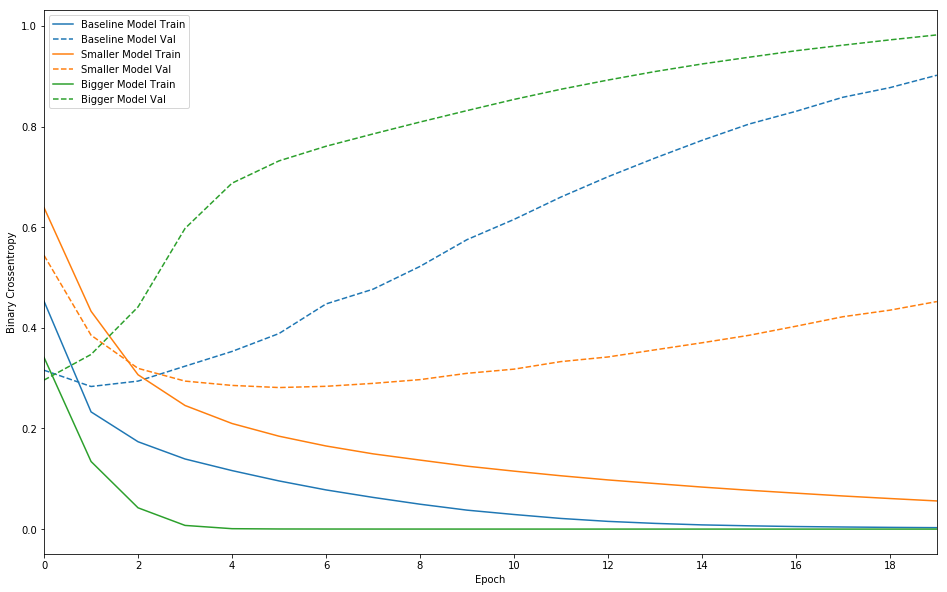

In [9]:
# Validation loss plot.
plt.figure(figsize=(16,10))

histories = [('Baseline Model', base_hist), ('Smaller Model', smaller_hist), ('Bigger Model', bigger_hist)]
for model, hist in histories:
    train = plt.plot(hist.epoch, hist.history['binary_crossentropy'], label=model+' Train')
    val = plt.plot(hist.epoch, hist.history['val_binary_crossentropy'], '--', color=train[0].get_color(), label=model+' Val')
    
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xlim([0, max(hist.epoch)])
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

From the above training and validation curves, the baseline model starts overfitting after epoch 1 while the smaller model starts overfitting after epoch 12 and the bigger model overfitted at the start of training. Although the smaller model suffers less in overfitting, it takes a lot more time to train than the baseline model with a even higher loss. 
There are several different ways to avoid overfitting:
- [ ] Obtain more training data
- [ ] Data augmentation
- [ ] Use a less complicated model
- [x] Regularization
- [x] Dropout
- [ ] Early start

For the next step of this notebook, L1 and L2 regularizations and dropout are applied to the baseline model to avoid overfitting.

In [10]:
# Baseline model with L1 regularization.
l1_base_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

l1_base_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

l1_base_hist = l1_base_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 1.1247 - acc: 0.7613 - binary_crossentropy: 0.5743 - val_loss: 0.6416 - val_acc: 0.8399 - val_binary_crossentropy: 0.4590
Epoch 2/20
 - 4s - loss: 0.5745 - acc: 0.8551 - binary_crossentropy: 0.3987 - val_loss: 0.5437 - val_acc: 0.8556 - val_binary_crossentropy: 0.3661
Epoch 3/20
 - 4s - loss: 0.5272 - acc: 0.8611 - binary_crossentropy: 0.3472 - val_loss: 0.5226 - val_acc: 0.8618 - val_binary_crossentropy: 0.3403
Epoch 4/20
 - 4s - loss: 0.5050 - acc: 0.8698 - binary_crossentropy: 0.3252 - val_loss: 0.5143 - val_acc: 0.8626 - val_binary_crossentropy: 0.3345
Epoch 5/20
 - 4s - loss: 0.4948 - acc: 0.8728 - binary_crossentropy: 0.3159 - val_loss: 0.5026 - val_acc: 0.8671 - val_binary_crossentropy: 0.3262
Epoch 6/20
 - 4s - loss: 0.4828 - acc: 0.8760 - binary_crossentropy: 0.3069 - val_loss: 0.4890 - val_acc: 0.8716 - val_binary_crossentropy: 0.3141
Epoch 7/20
 - 4s - loss: 0.4699 - acc: 0.8814 - binary_crossentropy:

In [11]:
# Baseline model with L2 regularization.
l2_base_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

l2_base_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

l2_base_model = l2_base_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5465 - acc: 0.8078 - binary_crossentropy: 0.5101 - val_loss: 0.4029 - val_acc: 0.8719 - val_binary_crossentropy: 0.3642
Epoch 2/20
 - 4s - loss: 0.3229 - acc: 0.9045 - binary_crossentropy: 0.2788 - val_loss: 0.3389 - val_acc: 0.8872 - val_binary_crossentropy: 0.2908
Epoch 3/20
 - 4s - loss: 0.2658 - acc: 0.9239 - binary_crossentropy: 0.2148 - val_loss: 0.3347 - val_acc: 0.8884 - val_binary_crossentropy: 0.2818
Epoch 4/20
 - 4s - loss: 0.2396 - acc: 0.9362 - binary_crossentropy: 0.1850 - val_loss: 0.3440 - val_acc: 0.8845 - val_binary_crossentropy: 0.2882
Epoch 5/20
 - 4s - loss: 0.2237 - acc: 0.9434 - binary_crossentropy: 0.1666 - val_loss: 0.3550 - val_acc: 0.8810 - val_binary_crossentropy: 0.2968
Epoch 6/20
 - 4s - loss: 0.2122 - acc: 0.9480 - binary_crossentropy: 0.1531 - val_loss: 0.3671 - val_acc: 0.8779 - val_binary_crossentropy: 0.3074
Epoch 7/20
 - 4s - loss: 0.2027 - acc: 0.9516 - binary_crossentropy:

In [12]:
# Baseline model with dropout layers.
dropout_base_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)    
])

dropout_base_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy', 'binary_crossentropy'])

dropout_base_model = dropout_base_model.fit(train_data,
                                            train_labels,
                                            epochs=20,
                                            batch_size=512,
                                            validation_data=(test_data, test_labels),
                                            verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5961 - acc: 0.6750 - binary_crossentropy: 0.5961 - val_loss: 0.4252 - val_acc: 0.8625 - val_binary_crossentropy: 0.4252
Epoch 2/20
 - 5s - loss: 0.4162 - acc: 0.8275 - binary_crossentropy: 0.4162 - val_loss: 0.3135 - val_acc: 0.8853 - val_binary_crossentropy: 0.3135
Epoch 3/20
 - 5s - loss: 0.3275 - acc: 0.8757 - binary_crossentropy: 0.3275 - val_loss: 0.2787 - val_acc: 0.8893 - val_binary_crossentropy: 0.2787
Epoch 4/20
 - 5s - loss: 0.2745 - acc: 0.9030 - binary_crossentropy: 0.2745 - val_loss: 0.2757 - val_acc: 0.8881 - val_binary_crossentropy: 0.2757
Epoch 5/20
 - 5s - loss: 0.2339 - acc: 0.9199 - binary_crossentropy: 0.2339 - val_loss: 0.2811 - val_acc: 0.8880 - val_binary_crossentropy: 0.2811
Epoch 6/20
 - 5s - loss: 0.2094 - acc: 0.9300 - binary_crossentropy: 0.2094 - val_loss: 0.2943 - val_acc: 0.8843 - val_binary_crossentropy: 0.2943
Epoch 7/20
 - 5s - loss: 0.1865 - acc: 0.9387 - binary_crossentropy:

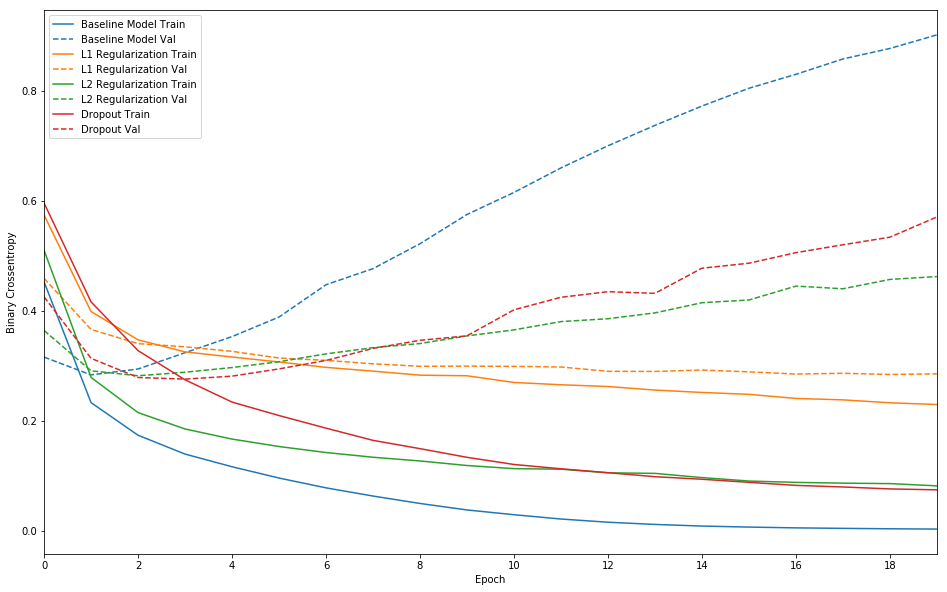

In [13]:
# Validation loss plot.
plt.figure(figsize=(16,10))

histories = [('Baseline Model', base_hist),
             ('L1 Regularization', l1_base_hist),
             ('L2 Regularization', l2_base_model),
             ('Dropout', dropout_base_model)]
for model, hist in histories:
    train = plt.plot(hist.epoch, hist.history['binary_crossentropy'], label=model+' Train')
    val = plt.plot(hist.epoch, hist.history['val_binary_crossentropy'], '--', color=train[0].get_color(), label=model+' Val')
    
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xlim([0, max(hist.epoch)])
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

From the above figure, it is obvious that the L1, L2 regularization and dropout methods can greatly reduce the effect of overfitting compared with the baseline model itself.